In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [69]:
data = pd.read_csv('data/diabetes.csv')
print(data.shape)
data.head()

# Dataset from: https://www.kaggle.com/code/towfeeqf/diabetes-prediction-ml/data

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [70]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Preliminary Decision Tree

In [72]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_clf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.708


The **training** accuracy shows that the model is overfitting 

In [73]:
max_depth = tree_clf.tree_.max_depth
node_count = tree_clf.tree_.node_count

print("Tree Max Depth:", max_depth, "Node Count:", node_count)

# There are other low level attributes:
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

Tree Max Depth: 13 Node Count: 195


In [74]:
# from sklearn import tree
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file="outputs/tree.dot", class_names=["positive", "negative"],
                feature_names=X.columns, impurity=False, filled=True)

# tree.plot_tree(tree_clf)

In [75]:
import graphviz

# with open("outputs/tree.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

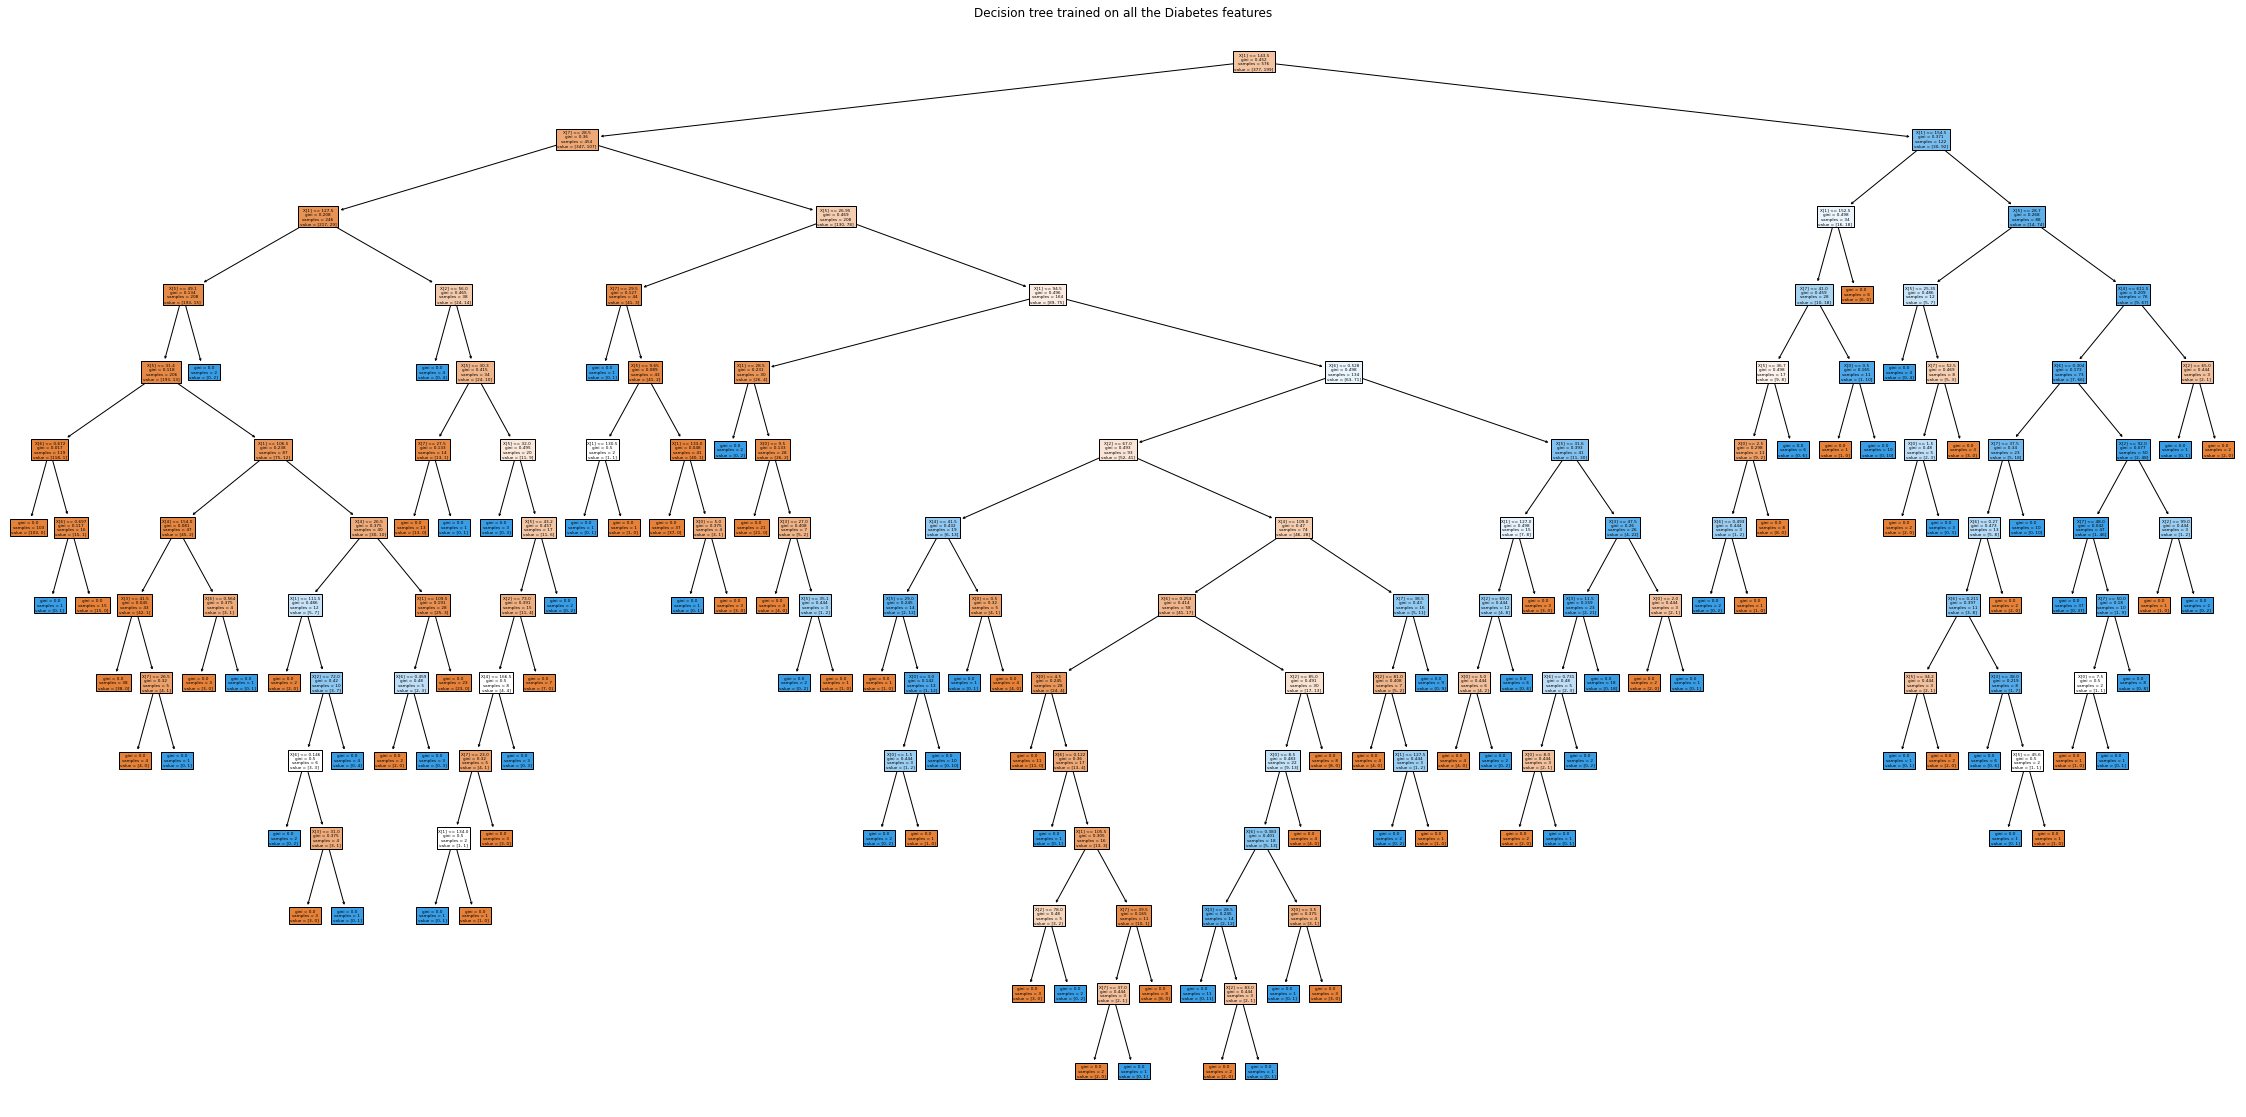

In [76]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 20))
plot_tree(tree_clf, filled=True)
plt.title("Decision tree trained on all the Diabetes features")
plt.show()

# https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py

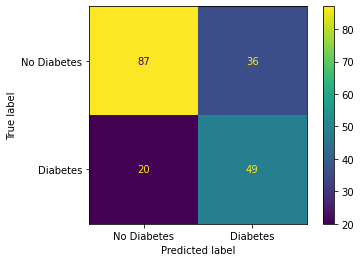

In [77]:
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix

plot_confusion_matrix(tree_clf, X_test, y_test, display_labels=["No Diabetes", "Diabetes"])

## Restricted Decision Tree

In [78]:
tree_clf2 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf2.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree_clf2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_clf2.score(X_test, y_test)))

Accuracy on training set: 0.844
Accuracy on test set: 0.724


In [79]:
print("Feature importances:")
print(tree_clf2.feature_importances_)

Feature importances:
[0.01297634 0.55025343 0.02545451 0.         0.01340007 0.19996743
 0.05106954 0.14687869]


In [80]:
def plot_feature_importances(model):
    
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

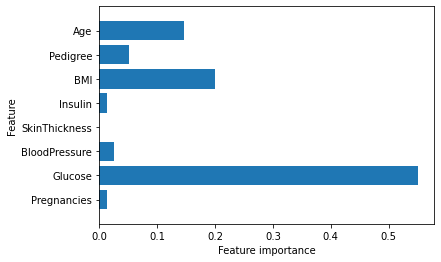

In [81]:
plot_feature_importances(tree_clf2)

# Feature importances is represented with a value between 0 and 1. 
# Where 0 means "not used at all", and 1 means "perfectly predits the target."

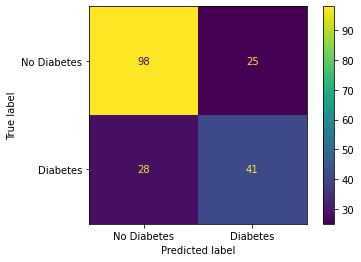

In [82]:
plot_confusion_matrix(tree_clf2, X_test, y_test, display_labels=["No Diabetes", "Diabetes"])